# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
oil = pd.read_excel('/content/Crude Oil Prices Daily 1986-2023.xlsx')
oil

,Date,Closing Value
0,1986-01-02,25.56
1,1986-01-03,26.00
2,1986-01-06,26.53
3,1986-01-07,25.85
4,1986-01-08,25.87
...,...,...
9607,2023-10-03,89.23
9608,2023-10-04,84.22
9609,2023-10-05,82.31
9610,2023-10-06,82.79


# Data Exploration

In [3]:
oil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9612 entries, 0 to 9611
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9612 non-null   datetime64[ns]
 1   Closing Value  9605 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 150.3 KB


In [4]:
oil.isna().value_counts()

Date   Closing Value
False  False            9605
       True                7
dtype: int64

There are 7 null values in data set.

In [5]:
# replacing na values in Closing Value of oil by Forward fill method
oil["Closing Value"].fillna( method ='ffill', inplace = True)
oil

,Date,Closing Value
0,1986-01-02,25.56
1,1986-01-03,26.00
2,1986-01-06,26.53
3,1986-01-07,25.85
4,1986-01-08,25.87
...,...,...
9607,2023-10-03,89.23
9608,2023-10-04,84.22
9609,2023-10-05,82.31
9610,2023-10-06,82.79


Filling Null values by Fill forward method

In [6]:
oil.describe()

,Closing Value
count,9612.000000
mean,46.847732
std,29.572656
min,-37.630000
25%,20.120000
50%,38.250000
75%,69.300000
max,145.310000


In [7]:
oil1 = oil.copy()
oil1.head

<bound method NDFrame.head of            Date  Closing Value
0    1986-01-02          25.56
1    1986-01-03          26.00
2    1986-01-06          26.53
3    1986-01-07          25.85
4    1986-01-08          25.87
...         ...            ...
9607 2023-10-03          89.23
9608 2023-10-04          84.22
9609 2023-10-05          82.31
9610 2023-10-06          82.79
9611 2023-10-09          86.38

[9612 rows x 2 columns]>

In [8]:
oil.set_index('Date', inplace=True)
oil

,Closing Value
Date,
1986-01-02,25.56
1986-01-03,26.00
1986-01-06,26.53
1986-01-07,25.85
1986-01-08,25.87
...,...
2023-10-03,89.23
2023-10-04,84.22
2023-10-05,82.31


# Data Visualization

## line Plot and Histogram

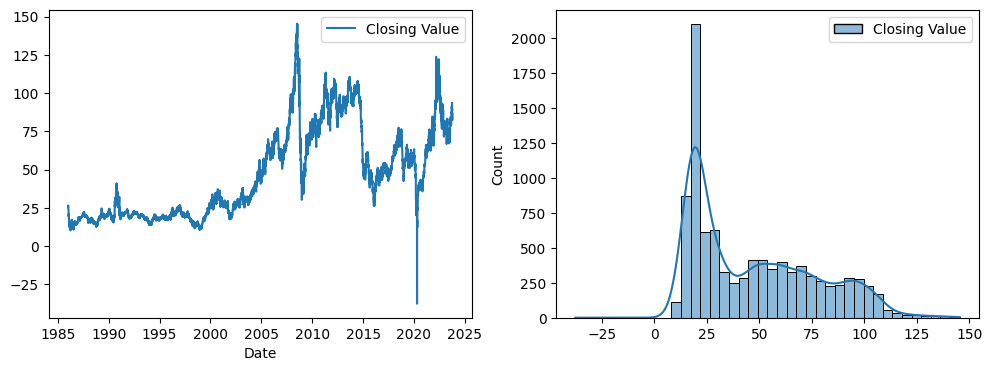

In [9]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.lineplot(data=oil)

plt.subplot(1, 2, 2)
sns.histplot(data=oil, kde= True)

plt.show()

The graph show right skewness

## Lag Plot

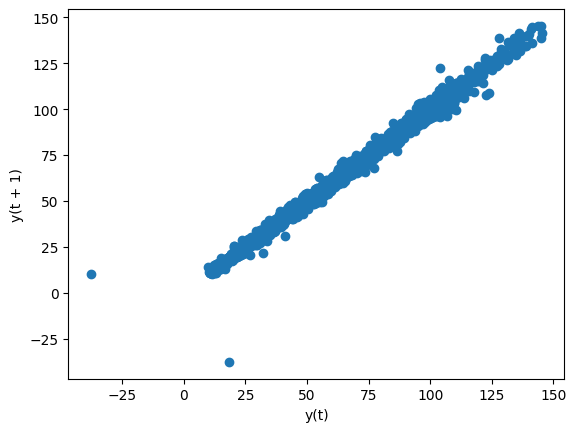

In [10]:
# create a scatter plot
from pandas import read_csv
from matplotlib import pyplot
from pandas.plotting import lag_plot
lag_plot(oil)
pyplot.show()

Here the lagplot show linear association between current value and sucession value

## Autocorrelation

<Figure size 4000x1000 with 0 Axes>

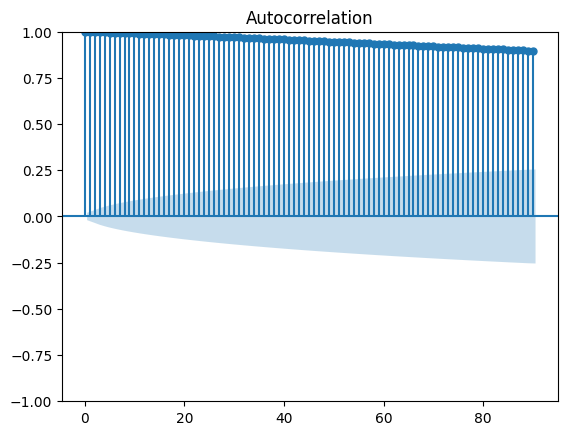

In [11]:
pyplot.figure(figsize = (40,10))
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(oil,lags=90)
pyplot.show()

There is degree of similarity between a time series and a lagged version of itself

## Box Plot

In [12]:
oil.rename(columns={'Closing Value': 'Closing_value', },inplace=True)
print(oil.columns)

Index(['Closing_value'], dtype='object')


In [13]:
oil1

,Date,Closing Value
0,1986-01-02,25.56
1,1986-01-03,26.00
2,1986-01-06,26.53
3,1986-01-07,25.85
4,1986-01-08,25.87
...,...,...
9607,2023-10-03,89.23
9608,2023-10-04,84.22
9609,2023-10-05,82.31
9610,2023-10-06,82.79


In [14]:
oil1['Date'] = pd.to_datetime(oil1.Date, format='%b-%y')
oil1["Month"]=oil1.Date.dt.strftime("%b")
oil1["Year"]=oil1.Date.dt.strftime("%Y")
oil1.head()

,Date,Closing Value,Month,Year
0,1986-01-02,25.56,Jan,1986
1,1986-01-03,26.00,Jan,1986
2,1986-01-06,26.53,Jan,1986
3,1986-01-07,25.85,Jan,1986
4,1986-01-08,25.87,Jan,1986


In [15]:
oil1.rename(columns={'Closing Value': 'Closing_value', },inplace=True)
print(oil1.columns)

Index(['Date', 'Closing_value', 'Month', 'Year'], dtype='object')


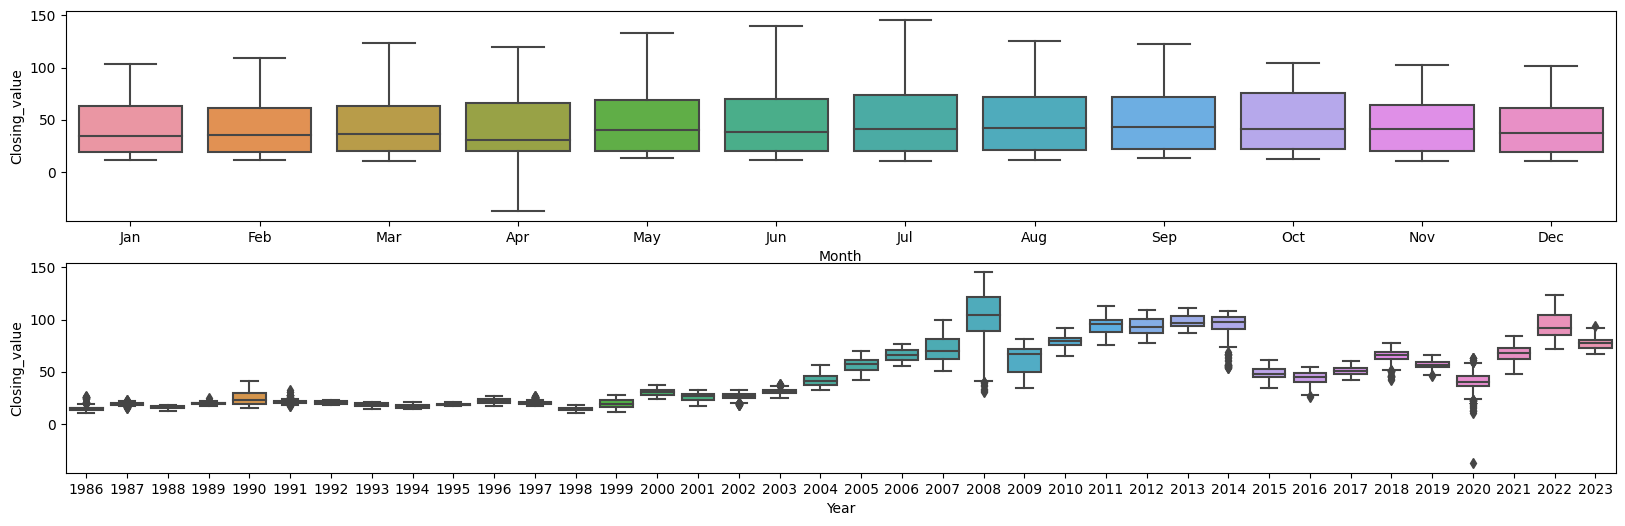

In [16]:
plt.figure(figsize=(20,6))
plt.subplot(211)
sns.boxplot(x="Month", y="Closing_value", data=oil1)
plt.subplot(212)
sns.boxplot(x="Year", y="Closing_value", data=oil1)
plt.show()

<Axes: xlabel='Month', ylabel='Year'>

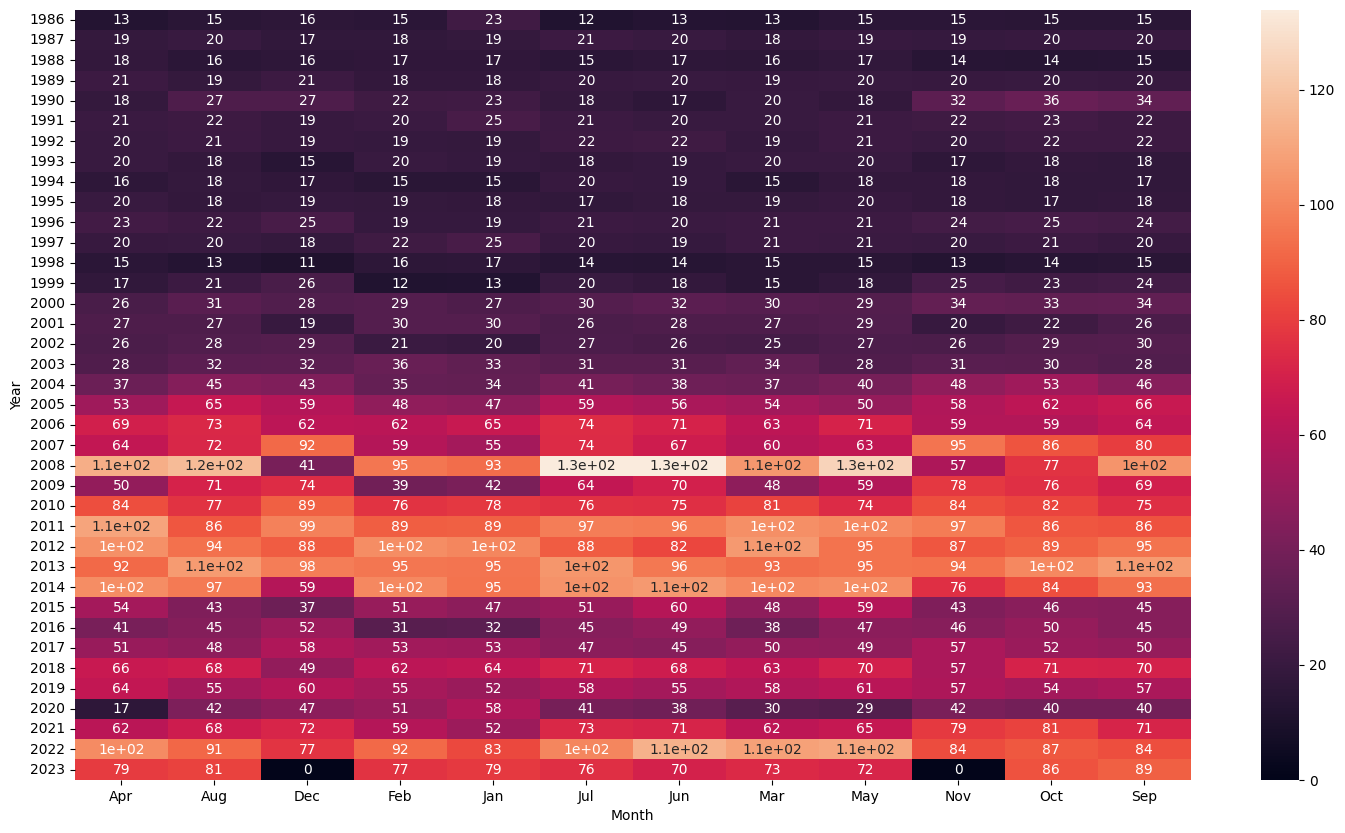

In [17]:
plt.figure(figsize=(18,10))
heatmap_y_month = pd.pivot_table(data=oil1,values='Closing_value',index='Year', columns="Month", aggfunc='mean', fill_value=0)
sns.heatmap(data = heatmap_y_month, annot=True)

In [18]:
new_data=pd.DataFrame(oil1)

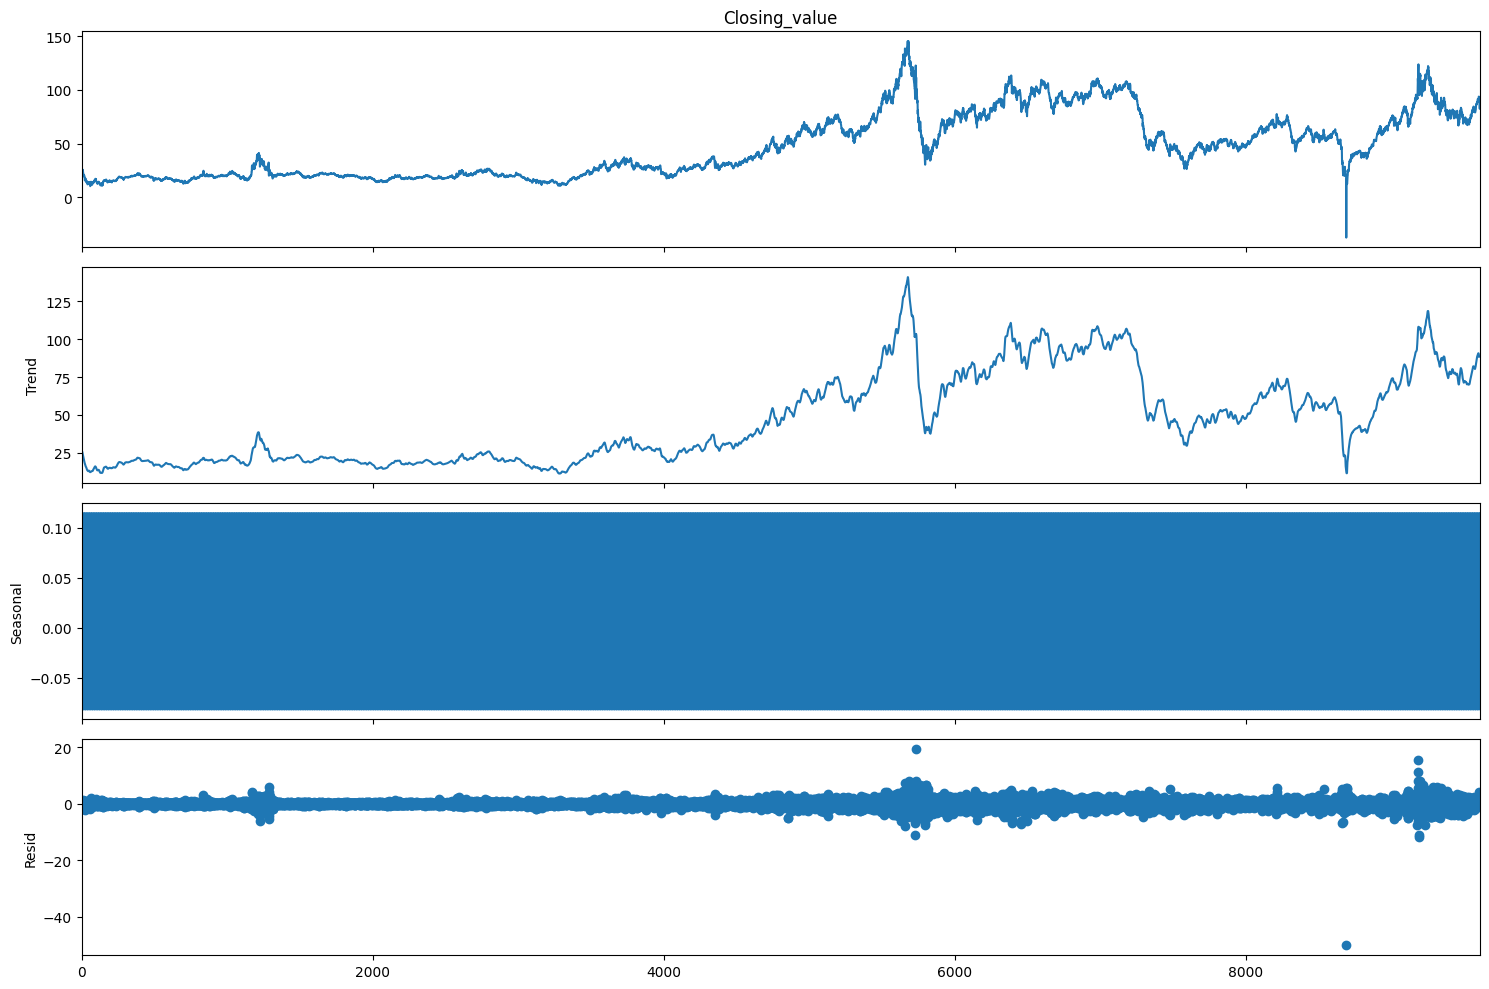

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompose_ts_add=seasonal_decompose(new_data.Closing_value, period=12)
with plt.rc_context():
    plt.rc("figure", figsize=(15,10))
    decompose_ts_add.plot()
    plt.show()

## Outliers

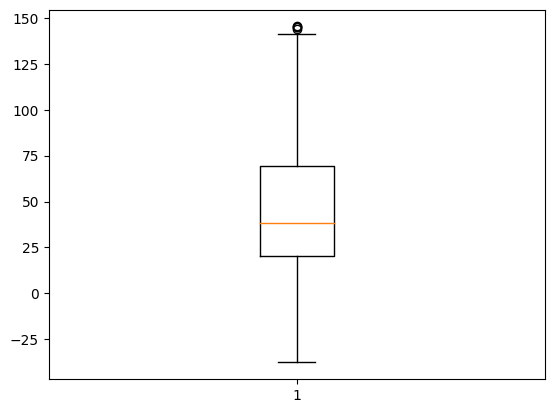

,Closing_value
count,9612.000000
mean,46.847732
std,29.572656
min,-37.630000
25%,20.120000
50%,38.250000
75%,69.300000
max,145.310000


In [20]:
#boxplot
plt.boxplot(oil1['Closing_value'])
plt.show()
oil.describe()

In [21]:
q1 = oil1['Closing_value'].quantile(0.25)
q3 = oil1['Closing_value'].quantile(0.75)
IQR = q3-q1

print ('Q1=',q1,'Q3=', q3,'IQR=', IQR)

Q1= 20.12 Q3= 69.3 IQR= 49.17999999999999


In [22]:
upper_limit = q3 + (1.5 * IQR)
lower_limit = q3 - (1.5 * IQR)

print ('Upper Limit=',upper_limit,'Lower Limit=', lower_limit)

Upper Limit= 143.07 Lower Limit= -4.469999999999985


In [23]:
#finding outliers
oil1.loc[(oil1['Closing_value'] > upper_limit) | (oil1['Closing_value'] < lower_limit)]

,Date,Closing_value,Month,Year
5677,2008-07-02,143.74,Jul,2008
5678,2008-07-03,145.31,Jul,2008
5683,2008-07-11,144.96,Jul,2008
5684,2008-07-14,145.16,Jul,2008
8692,2020-04-20,-37.63,Apr,2020


In [24]:
# trimming the outlier values
df = oil1.loc[(oil1['Closing_value'] < upper_limit) & (oil1['Closing_value'] > lower_limit)]

print('with ouliers =', len(oil1))
print('after removing outliers =', len(df))

with ouliers = 9612
after removing outliers = 9607


In [25]:
df

,Date,Closing_value,Month,Year
0,1986-01-02,25.56,Jan,1986
1,1986-01-03,26.00,Jan,1986
2,1986-01-06,26.53,Jan,1986
3,1986-01-07,25.85,Jan,1986
4,1986-01-08,25.87,Jan,1986
...,...,...,...,...
9607,2023-10-03,89.23,Oct,2023
9608,2023-10-04,84.22,Oct,2023
9609,2023-10-05,82.31,Oct,2023
9610,2023-10-06,82.79,Oct,2023


# Model Building

## Creating Requried transformations

In [26]:
# Creating parameter t
df['t'] = df.index + 1

## Create the parameter t^2
df['t_square'] = df['t'] ** 2

# Create the parameter log_value
import math
df['log_value'] = df['Closing_value'].apply(lambda x: round(math.log(x), 6))

df.head()

<ipython-input-26-45cd1e36e19f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['t'] = df.index + 1
<ipython-input-26-45cd1e36e19f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['t_square'] = df['t'] ** 2
<ipython-input-26-45cd1e36e19f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retur

,Date,Closing_value,Month,Year,t,t_square,log_value
0,1986-01-02,25.56,Jan,1986,1,1,3.241029
1,1986-01-03,26.00,Jan,1986,2,4,3.258097
2,1986-01-06,26.53,Jan,1986,3,9,3.278276
3,1986-01-07,25.85,Jan,1986,4,16,3.252311
4,1986-01-08,25.87,Jan,1986,5,25,3.253084


In [27]:
# Create dummy variables for the month
month_dummies = pd.get_dummies(df['Date'].dt.strftime('%b'), prefix='', prefix_sep='')
month_dummies.head()

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0


In [28]:
#joining the two data sets
df = pd.concat([df, month_dummies], axis=1)
df.head()

,Date,Closing_value,Month,Year,t,t_square,log_value,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1986-01-02,25.56,Jan,1986,1,1,3.241029,0,0,0,0,1,0,0,0,0,0,0,0
1,1986-01-03,26.00,Jan,1986,2,4,3.258097,0,0,0,0,1,0,0,0,0,0,0,0
2,1986-01-06,26.53,Jan,1986,3,9,3.278276,0,0,0,0,1,0,0,0,0,0,0,0
3,1986-01-07,25.85,Jan,1986,4,16,3.252311,0,0,0,0,1,0,0,0,0,0,0,0
4,1986-01-08,25.87,Jan,1986,5,25,3.253084,0,0,0,0,1,0,0,0,0,0,0,0


In [29]:
# Reorder the columns to match the reference dataset
df = df[['Date','Closing_value','t','t_square','log_value','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Month','Year']]
df

,Date,Closing_value,t,t_square,log_value,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Month,Year
0,1986-01-02,25.56,1,1,3.241029,1,0,0,0,0,0,0,0,0,0,0,0,Jan,1986
1,1986-01-03,26.00,2,4,3.258097,1,0,0,0,0,0,0,0,0,0,0,0,Jan,1986
2,1986-01-06,26.53,3,9,3.278276,1,0,0,0,0,0,0,0,0,0,0,0,Jan,1986
3,1986-01-07,25.85,4,16,3.252311,1,0,0,0,0,0,0,0,0,0,0,0,Jan,1986
4,1986-01-08,25.87,5,25,3.253084,1,0,0,0,0,0,0,0,0,0,0,0,Jan,1986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9607,2023-10-03,89.23,9608,92313664,4.491217,0,0,0,0,0,0,0,0,0,1,0,0,Oct,2023
9608,2023-10-04,84.22,9609,92332881,4.433432,0,0,0,0,0,0,0,0,0,1,0,0,Oct,2023
9609,2023-10-05,82.31,9610,92352100,4.410493,0,0,0,0,0,0,0,0,0,1,0,0,Oct,2023
9610,2023-10-06,82.79,9611,92371321,4.416307,0,0,0,0,0,0,0,0,0,1,0,0,Oct,2023


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9607 entries, 0 to 9611
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9607 non-null   datetime64[ns]
 1   Closing_value  9607 non-null   float64       
 2   t              9607 non-null   int64         
 3   t_square       9607 non-null   int64         
 4   log_value      9607 non-null   float64       
 5   Jan            9607 non-null   uint8         
 6   Feb            9607 non-null   uint8         
 7   Mar            9607 non-null   uint8         
 8   Apr            9607 non-null   uint8         
 9   May            9607 non-null   uint8         
 10  Jun            9607 non-null   uint8         
 11  Jul            9607 non-null   uint8         
 12  Aug            9607 non-null   uint8         
 13  Sep            9607 non-null   uint8         
 14  Oct            9607 non-null   uint8         
 15  Nov            9607 n

## Splitting Data

In [31]:
df.set_index('Date', inplace=True)

In [32]:
Train = df.head(8000)
Test = df.tail(1607)

In [33]:
Train.head()

,Closing_value,t,t_square,log_value,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Month,Year
Date,,,,,,,,,,,,,,,,,,
1986-01-02,25.56,1,1,3.241029,1,0,0,0,0,0,0,0,0,0,0,0,Jan,1986
1986-01-03,26.00,2,4,3.258097,1,0,0,0,0,0,0,0,0,0,0,0,Jan,1986
1986-01-06,26.53,3,9,3.278276,1,0,0,0,0,0,0,0,0,0,0,0,Jan,1986
1986-01-07,25.85,4,16,3.252311,1,0,0,0,0,0,0,0,0,0,0,0,Jan,1986
1986-01-08,25.87,5,25,3.253084,1,0,0,0,0,0,0,0,0,0,0,0,Jan,1986


In [34]:
Test.head()

,Closing_value,t,t_square,log_value,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Month,Year
Date,,,,,,,,,,,,,,,,,,
2017-09-06,49.16,8005,64080025,3.895080,0,0,0,0,0,0,0,0,1,0,0,0,Sep,2017
2017-09-07,49.09,8006,64096036,3.893655,0,0,0,0,0,0,0,0,1,0,0,0,Sep,2017
2017-09-08,47.48,8007,64112049,3.860309,0,0,0,0,0,0,0,0,1,0,0,0,Sep,2017
2017-09-11,48.07,8008,64128064,3.872658,0,0,0,0,0,0,0,0,1,0,0,0,Sep,2017
2017-09-12,48.23,8009,64144081,3.875981,0,0,0,0,0,0,0,0,1,0,0,0,Sep,2017


Splitting data from total 9608 content into training and testing data sequentially  

## Linear Operation

In [35]:
import statsmodels.formula.api as smf

linear_model = smf.ols('Closing_value~t',data=Train).fit()                                                        # fitting the model
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))                                           # prediction
rmse_linear = np.sqrt(np.mean((np.array(Test['Closing_value'])-np.array(pred_linear))**2))                        # RMSE
rmse_linear

29.42391323095504

## EX-Logerithmic Operation

In [36]:
Exp = smf.ols('log_value~t',data=Train).fit()                                                                  # fitting the model
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))                                                     # prediction
rmse_Exp = np.sqrt(np.mean((np.array(Test['Closing_value'])-np.array(np.exp(pred_Exp)))**2))                   # RMSE
rmse_Exp


45.66164314242833

## Quadratic Operation

In [37]:
Quad = smf.ols('Closing_value~t+t_square',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_square"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Closing_value'])-np.array(pred_Quad))**2))
rmse_Quad

34.49596567453932

## Additive seasonality

In [38]:
add_sea = smf.ols('Closing_value~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Closing_value'])-np.array(pred_add_sea))**2))
rmse_add_sea

29.659372187189305

## Additive Seasonality Quadratic

In [39]:
add_sea_Quad = smf.ols('Closing_value~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','t','t_square']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Closing_value'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

34.44676189932791

## Multiplicative Seasonality

In [40]:
Mul_sea = smf.ols('log_value~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Closing_value'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

36.772478967258735

## Multiplicative Additive Seasonality

In [41]:
Mul_Add_sea = smf.ols('log_value~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Closing_value'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea

45.769567243175565

In [42]:
#Compare the results

Result = {"MODEL":pd.Series(["rmse_linear","rmse_Exp-log","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(Result)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
0,rmse_linear,29.423913
3,rmse_add_sea,29.659372
4,rmse_add_sea_quad,34.446762
2,rmse_Quad,34.495966
5,rmse_Mult_sea,36.772479
1,rmse_Exp-log,45.661643
6,rmse_Mult_add_sea,45.769567


<Axes: xlabel='MODEL', ylabel='RMSE_Values'>

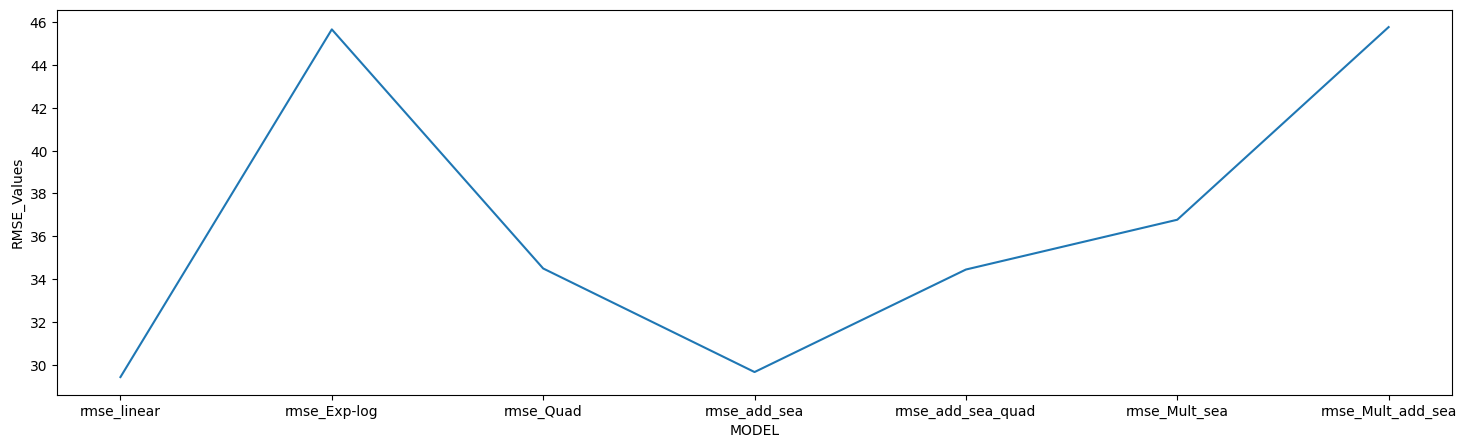

In [43]:
plt.figure(figsize=(18,5))
sns.lineplot(data=Result, x='MODEL',y='RMSE_Values')

### we can see here linear model and additive seasonality model posses minimum RMSE value, so we can use anyone of model for forecasting

In [44]:
from statsmodels.tsa.stattools import adfuller

test_result = adfuller(df['Closing_value'])

def adfuller_test(Closing_value):
  result=adfuller(Closing_value)
  labels = ['ADF_stats', 'P_Value', 'Num of Lags', 'no of observations']
  for value,label in zip(result,labels):
    print(label+' : '+str(value))


In [45]:
adfuller_test(df['Closing_value'])

ADF_stats : -2.2871090806310375
P_Value : 0.17615926153082445
Num of Lags : 38
no of observations : 9568


## here p value is greater than 0.05 hense null hypothesis accepted (indicating it is a non stationary value)

# Differencing

In [46]:
df1 =pd.DataFrame(df['Closing_value'])
df1

,Closing_value
Date,
1986-01-02,25.56
1986-01-03,26.00
1986-01-06,26.53
1986-01-07,25.85
1986-01-08,25.87
...,...
2023-10-03,89.23
2023-10-04,84.22
2023-10-05,82.31


In [47]:
df1['Sfirst_diff'] = df1['Closing_value']-df1['Closing_value'].shift(1)
df1.tail()

,Closing_value,Sfirst_diff
Date,,
2023-10-03,89.23,0.41
2023-10-04,84.22,-5.01
2023-10-05,82.31,-1.91
2023-10-06,82.79,0.48
2023-10-09,86.38,3.59


In [48]:
# Again test dicky fuller test
adfuller_test(df1['Sfirst_diff'].dropna())

ADF_stats : -13.296900495204893
P_Value : 7.1756556801053125e-25
Num of Lags : 38
no of observations : 9567


## here p value is far less than 0.05 hens null hypo. rejected; data has no unit root and it is stationary

<Axes: xlabel='Date'>

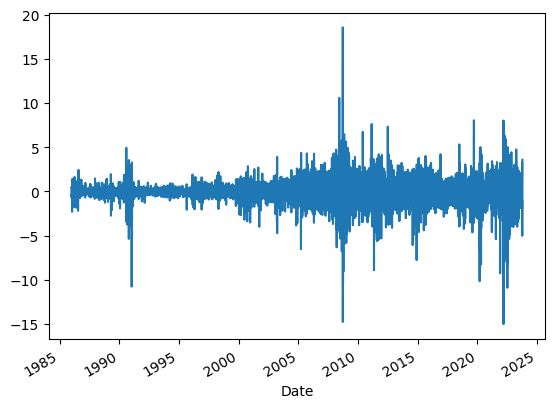

In [49]:
df1['Sfirst_diff'].plot()

In [50]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels as sm

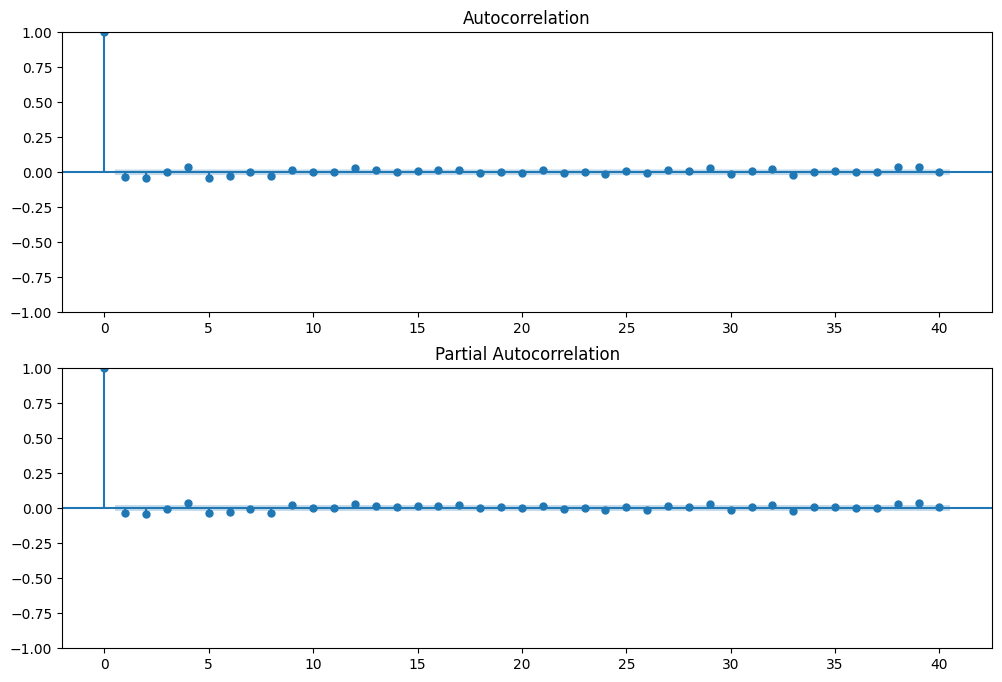

In [51]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df1['Sfirst_diff'].iloc[30:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df1['Sfirst_diff'].iloc[30:],lags=40,ax=ax2)

## For non seasonal data
## p=1, d=1 & q=0 or 1

In [52]:
from statsmodels.tsa.arima.model import ARIMA

model=ARIMA(Test['Closing_value'],order=(1,1,1))
model=model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [53]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          Closing_value   No. Observations:                 1607
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3170.981
Date:                Wed, 08 Nov 2023   AIC                           6347.963
Time:                        17:11:22   BIC                           6364.107
Sample:                             0   HQIC                          6353.957
                               - 1607                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7739      0.144      5.364      0.000       0.491       1.057
ma.L1         -0.8027      0.136     -5.918      0.000      -1.069      -0.537
sigma2         3.0375      0.050     61.328      0.000       2.940       3.135
===================================================================================
Ljung-Box (L1) (Q):                   2.67   Jarque-Bera (JB):              4641.34
Prob(Q):                              0.10   Prob(JB):                         0.00
Heteroskedasticity (H):               4.14   Skew:                            -0.95
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Making Prediction on Testset

In [54]:
start = len(Train)
end = len(Train) + len(Test)-1
pred = model.predict(start=start,end=end,dynamic=True)
pred.index=df.index[start:end+1]
pred=pd.DataFrame(pred)
pred

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/kalman_filter.py:2473: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'


,predicted_mean
Date,
2017-09-06,86.422225
2017-09-07,86.422225
2017-09-08,86.422225
2017-09-11,86.422225
2017-09-12,86.422225
...,...
2023-10-03,86.422225
2023-10-04,86.422225
2023-10-05,86.422225


<Axes: xlabel='Date'>

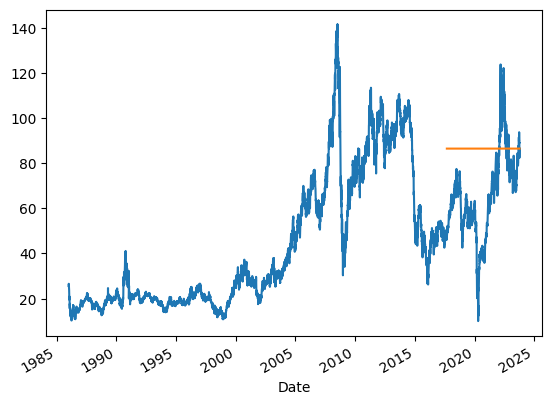

In [55]:
df['Closing_value'].plot()
pred['predicted_mean'].plot()

In [56]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(pred,Test['Closing_value']))
print(rmse)

27.760219182160142


# Future Prediction

In [57]:
model2=ARIMA(df['Closing_value'],order = (1, 1, 1)).fit()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [58]:
index_future_dates=pd.date_range(start='2023-10-09', end='2024-10-09' )

pred2 = model2.predict(start=len(df),end=len(df)+366,typ='levels')


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [59]:
pred2.index=index_future_dates
pred2=pd.DataFrame(pred2)
pred2

,predicted_mean
2023-10-09,86.315665
2023-10-10,86.277995
2023-10-11,86.255938
2023-10-12,86.243023
2023-10-13,86.235461
...,...
2024-10-05,86.224778
2024-10-06,86.224778
2024-10-07,86.224778
2024-10-08,86.224778


<Axes: xlabel='Date'>

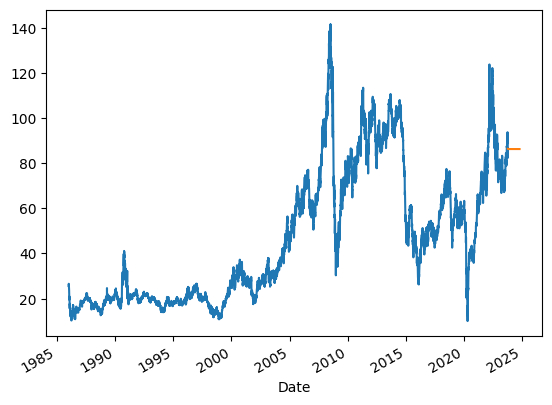

In [60]:
df['Closing_value'].plot()
pred2['predicted_mean'].plot()

# LSTM Model Building

### Import librares

In [61]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import datetime
from pylab import rcParams
import matplotlib.pyplot as plt
import warnings
import itertools
import statsmodels.api as sm
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.metrics import mean_squared_error
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import seaborn as sns
sns.set_context("paper", font_scale=1.3)
sns.set_style('white')
import math
from sklearn.preprocessing import MinMaxScaler


In [62]:
import io
ds = pd.read_excel('/content/Crude Oil Prices Daily 1986-2023.xlsx')
ds.head()
ds[:10]

,Date,Closing Value
0,1986-01-02,25.56
1,1986-01-03,26.00
2,1986-01-06,26.53
3,1986-01-07,25.85
4,1986-01-08,25.87
5,1986-01-09,26.03
6,1986-01-10,25.65
7,1986-01-13,25.08
8,1986-01-14,24.97
9,1986-01-15,25.18


In [63]:
ds.isnull().sum()

Date             0
Closing Value    7
dtype: int64

In [64]:
ds.dropna(axis=0,inplace=True)

In [65]:
ds.isnull().sum()

Date             0
Closing Value    0
dtype: int64

In [66]:
data=ds.reset_index()['Closing Value']
data

0       25.56
1       26.00
2       26.53
3       25.85
4       25.87
        ...  
9600    89.23
9601    84.22
9602    82.31
9603    82.79
9604    86.38
Name: Closing Value, Length: 9605, dtype: float64

In [67]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
data=scaler.fit_transform(np.array(data).reshape(-1,1))

In [68]:
data

array([[0.3454138 ],
       [0.34781896],
       [0.35071608],
       ...,
       [0.6556248 ],
       [0.65824861],
       [0.67787253]])

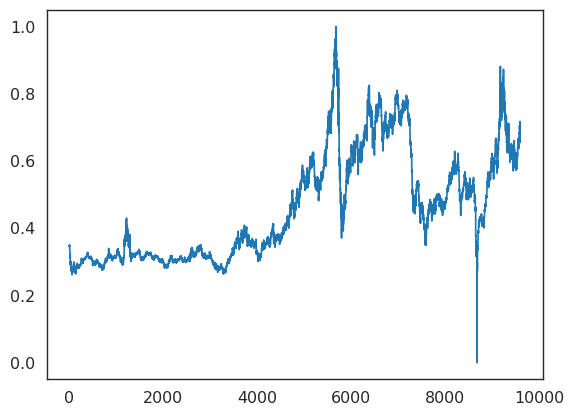

In [69]:
plt.plot(data)

In [70]:
training_size=int(len(data)*0.65)
test_size=len(data)-training_size
train_data,test_data=data[0:training_size,:],data[training_size:len(data),:1]

In [71]:
training_size,test_size

(6243, 3362)

In [72]:
train_data.shape

(6243, 1)

In [73]:
def create_dataset(dataset,time_step=1):
  dataX,dataY=[],[]
  for i in range(len(dataset)-time_step-1):
    a=dataset[i:(i+time_step),0]
    dataX.append(a)
    dataY.append(dataset[i+time_step,0])
  return np.array(dataX),np.array(dataY)

In [74]:
time_step=10
x_train,y_train=create_dataset(train_data,time_step)
x_test,y_test=create_dataset(test_data,time_step)

In [75]:
print(x_train.shape),print(y_train.shape)


(6232, 10)
(6232,)


(None, None)

In [76]:
print(x_test.shape),print(y_test.shape)


(3351, 10)
(3351,)


(None, None)

In [77]:
x_train

array([[0.3454138 , 0.34781896, 0.35071608, ..., 0.34278999, 0.3421887 ,
        0.34333661],
       [0.34781896, 0.35071608, 0.34699902, ..., 0.3421887 , 0.34333661,
        0.33677709],
       [0.35071608, 0.34699902, 0.34710834, ..., 0.34333661, 0.33677709,
        0.33486389],
       ...,
       [0.62331912, 0.62752815, 0.6253963 , ..., 0.60451514, 0.60462447,
        0.6069203 ],
       [0.62752815, 0.6253963 , 0.62069531, ..., 0.60462447, 0.6069203 ,
        0.61364382],
       [0.6253963 , 0.62069531, 0.6133705 , ..., 0.6069203 , 0.61364382,
        0.62392041]])

In [78]:
x_test

array([[0.64272439, 0.65157975, 0.65081447, ..., 0.65491418, 0.65212638,
        0.65956051],
       [0.65157975, 0.65081447, 0.65846726, ..., 0.65212638, 0.65956051,
        0.6578113 ],
       [0.65081447, 0.65846726, 0.66054444, ..., 0.65956051, 0.6578113 ,
        0.64972122],
       ...,
       [0.69919099, 0.69563791, 0.69782442, ..., 0.70197879, 0.69121023,
        0.6934514 ],
       [0.69563791, 0.69782442, 0.69591123, ..., 0.69121023, 0.6934514 ,
        0.66606538],
       [0.69782442, 0.69591123, 0.69979228, ..., 0.6934514 , 0.66606538,
        0.6556248 ]])

In [79]:
x_train1=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [80]:
x_train1

array([[[0.3454138 ],
        [0.34781896],
        [0.35071608],
        ...,
        [0.34278999],
        [0.3421887 ],
        [0.34333661]],

       [[0.34781896],
        [0.35071608],
        [0.34699902],
        ...,
        [0.3421887 ],
        [0.34333661],
        [0.33677709]],

       [[0.35071608],
        [0.34699902],
        [0.34710834],
        ...,
        [0.34333661],
        [0.33677709],
        [0.33486389]],

       ...,

       [[0.62331912],
        [0.62752815],
        [0.6253963 ],
        ...,
        [0.60451514],
        [0.60462447],
        [0.6069203 ]],

       [[0.62752815],
        [0.6253963 ],
        [0.62069531],
        ...,
        [0.60462447],
        [0.6069203 ],
        [0.61364382]],

       [[0.6253963 ],
        [0.62069531],
        [0.6133705 ],
        ...,
        [0.6069203 ],
        [0.61364382],
        [0.62392041]]])

# **MODEL BUILDING**

#### IMPORTING MODEL BUILDING LIBRARIES

In [81]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

### INITIALIZING THE MODEL

In [82]:
model=Sequential()

### ADDING LSTM AND OUTPUT  LAYERS

In [83]:
model.add(LSTM(50,return_sequences=True,input_shape=(10,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))

In [84]:
model.add(Dense(1))

In [85]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 10, 50)            20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## CONFIGURING THE LEARNING PROCESS

In [86]:
model.compile(loss='mean_squared_error',optimizer='adam')

## MODEL TRAINING

In [87]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=3,batch_size=64,verbose=1)

Epoch 1/3
98/98 [==============================] - 12s 54ms/step - loss: 0.0129 - val_loss: 5.3577e-04
Epoch 2/3
98/98 [==============================] - 4s 37ms/step - loss: 1.9687e-04 - val_loss: 4.4470e-04
Epoch 3/3
98/98 [==============================] - 3s 32ms/step - loss: 1.9129e-04 - val_loss: 4.3487e-04


# MODEL EVALUATION

In [88]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_data)
test_predict=scaler.inverse_transform(test_data)
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(train_data,train_predict))

41.07003415093244

## MODEL SAVING

In [89]:
from tensorflow.keras.models import load_model

In [90]:
model.save("crude_oil.hs")

## MODEL TESTING

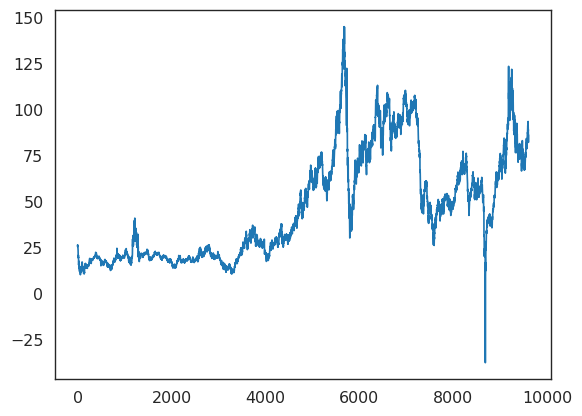

In [91]:
### Plotting
look_back=10
trainpredictPlot = np.empty_like(data)
trainpredictPlot[:, :]= np.nan
trainpredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictplot = np.empty_like(data)
testPredictplot[:,: ] = np.nan
testPredictplot[look_back:len(test_predict)+look_back, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(data))
plt.show()

In [92]:
len(test_data)

3362

In [93]:
x_input=test_data[2866:].reshape(1,-1)
x_input.shape

(1, 496)

In [94]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [95]:
temp_input

[0.5880616595605117,
 0.5674538099923473,
 0.5641193834043949,
 0.5692030173827485,
 0.5678911118399477,
 0.5855471739368099,
 0.5995408330600197,
 0.6012353777194709,
 0.5934732699245655,
 0.5974636492839183,
 0.5953864655078168,
 0.5923253525746146,
 0.5930906308079152,
 0.601344703181371,
 0.5930359680769652,
 0.5786596698371052,
 0.5944571990816662,
 0.6034218869574725,
 0.6090521482453264,
 0.6187821143544332,
 0.6210232863233848,
 0.624193724718487,
 0.6265442221493386,
 0.6168142560402318,
 0.6215699136328852,
 0.6265442221493386,
 0.6312452170110419,
 0.640045916693998,
 0.6369848037607959,
 0.6333224007871434,
 0.6496665573412048,
 0.6574286651361103,
 0.6545862031267082,
 0.6638788673882148,
 0.6639335301191648,
 0.6631682518858643,
 0.6726795670711709,
 0.6810429649065267,
 0.6807149885208266,
 0.6710943478736198,
 0.6610910681097628,
 0.6736088334973216,
 0.6831748114135783,
 0.6791297693232754,
 0.6802776866732262,
 0.6875478298895814,
 0.6878211435443315,
 0.6881491199300

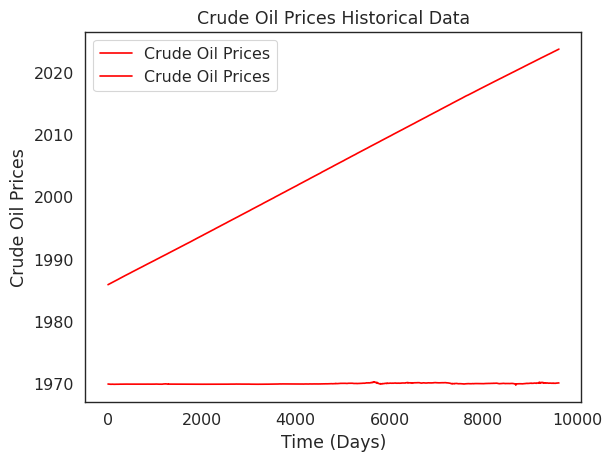

In [96]:
import matplotlib.pyplot as plt
ds_plot = ds.iloc[:,1:2].values
# Visualising the Data
plt.plot(ds, color = 'red', label = 'Crude Oil Prices')
plt.title('Crude Oil Prices Historical Data')
plt.xlabel('Time (Days)')
plt.ylabel('Crude Oil Prices')
plt.legend()
plt.show()

In [97]:
#import packages
import numpy as np
import pandas as pd
from keras.preprocessing import sequence
from keras.models import load_model

In [98]:
# defining the batch size and number of epochs
batch_size = 64
epochs = 120
timesteps = 30

In [99]:
length = len(ds)
print(length)

#test set will be 10% of entire data set
length *= 1 - 0.1
print(length)

9605
8644.5


In [100]:
#get the length of training data set
def get_train_length(dataset, batch_size, test_percent):
    # substract test_percent to be excluded from training, reserved for testset
    length = len(dataset)
    length *= 1 - test_percent
    train_length_values = []
    for x in range(int(length) - 100,int(length)):
        modulo=x%batch_size
        if (modulo == 0):
            train_length_values.append(x)
            print(x)
    return (max(train_length_values))

In [101]:
length = get_train_length(ds, batch_size, 0.1)
print(length)

8576
8640
8640


In [102]:
#Adding timesteps * 2
upper_train = length + timesteps*2
ds_train = ds[0:upper_train]
training_set = ds_train.iloc[:,1:2].values
training_set.shape

(8700, 1)

In [103]:
# Feature Scaling i.e we scale each and every value between 0 and 1
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(np.float64(training_set))
training_set_scaled.shape

(8700, 1)

In [104]:
X_train = []
y_train = []

# Creating a data structure with n timesteps

print(length + timesteps)
for i in range(timesteps, length + timesteps):
    X_train.append(training_set_scaled[i-timesteps:i,0])
    y_train.append(training_set_scaled[i:i+timesteps,0])

print(len(X_train))
print(len (y_train))
print(np.array(X_train).shape)
print(np.array(y_train).shape)

8670
8640
8640
(8640, 30)
(8640, 30)


In [105]:
# Reshaping
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], y_train.shape[1], 1))
print(X_train.shape)
print(y_train.shape)

(8640, 30, 1)
(8640, 30, 1)


## Building the LSTM

In [106]:
# Building the LSTM
# Importing the Keras libraries and packages

from keras.layers import Dense
from keras.layers import Input, LSTM
from keras.models import Model
import h5py

In [107]:
# Initialising the LSTM Model with MAE Loss-Function
# Using Functional API

inputs_1_mae = Input(batch_shape=(batch_size,timesteps,1))
lstm_1_mae = LSTM(10, stateful=True, return_sequences=True)(inputs_1_mae)
lstm_2_mae = LSTM(10, stateful=True, return_sequences=True)(lstm_1_mae)

output_1_mae = Dense(units = 1)(lstm_2_mae)

regressor_mae = Model(inputs=inputs_1_mae, outputs = output_1_mae)

regressor_mae.compile(optimizer='adam', loss = 'mae')
regressor_mae.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(64, 30, 1)]             0         
                                                                 
 lstm_3 (LSTM)               (64, 30, 10)              480       
                                                                 
 lstm_4 (LSTM)               (64, 30, 10)              840       
                                                                 
 dense_1 (Dense)             (64, 30, 1)               11        
                                                                 
Total params: 1331 (5.20 KB)
Trainable params: 1331 (5.20 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [108]:
# 1st LSTM Layer
parameters = 4 * 10 * (1 + 10 + 1)
print(parameters)

480


In [109]:
# 2nd LSTM Layer
parameters = 4 * 10 * (10 + 10 + 1)
print(parameters)

840


In [110]:
for i in range(epochs):
    print("Epoch: " + str(i))
    regressor_mae.fit(X_train, y_train, shuffle=False, epochs = 1, batch_size = batch_size)
    regressor_mae.reset_states()

Epoch: 0
135/135 [==============================] - 8s 28ms/step - loss: 0.0603
Epoch: 1
135/135 [==============================] - 3s 20ms/step - loss: 0.0462
Epoch: 2
135/135 [==============================] - 3s 20ms/step - loss: 0.0444
Epoch: 3
135/135 [==============================] - 4s 29ms/step - loss: 0.0422
Epoch: 4
135/135 [==============================] - 3s 21ms/step - loss: 0.0396
Epoch: 5
135/135 [==============================] - 3s 22ms/step - loss: 0.0383
Epoch: 6
135/135 [==============================] - 3s 20ms/step - loss: 0.0363
Epoch: 7
135/135 [==============================] - 3s 19ms/step - loss: 0.0349
Epoch: 8
135/135 [==============================] - 3s 21ms/step - loss: 0.0345
Epoch: 9
135/135 [==============================] - 3s 24ms/step - loss: 0.0330
Epoch: 10
135/135 [==============================] - 3s 22ms/step - loss: 0.0323
Epoch: 11
135/135 [==============================] - 3s 21ms/step - loss: 0.0315
Epoch: 12
135/135 [===================

In [111]:
!pwd
!ls models/*.h5

/content
ls: cannot access 'models/*.h5': No such file or directory


In [112]:
def get_test_length(dataset, batch_size):

    test_length_values = []
    for x in range(len(dataset) - 200, len(dataset) - timesteps*2):
        modulo=(x-upper_train)%batch_size
        if (modulo == 0):
            test_length_values.append(x)
            print(x)
    return (max(test_length_values))

In [113]:
test_length = get_test_length(ds, batch_size)
print(test_length)
upper_test = test_length + timesteps*2
testset_length = test_length - upper_train
print(testset_length)

9468
9532
9532
832


In [114]:
print(upper_train, upper_test, len(ds))

8700 9592 9605


In [115]:
# construct test set

#subsetting
ds_test = ds[upper_train:upper_test]
test_set = ds_test.iloc[:,1:2].values

#scaling
scaled_real_bcg_values_test = sc.fit_transform(np.float64(test_set))

#creating input data
X_test = []
for i in range(timesteps, testset_length + timesteps):
    X_test.append(scaled_real_bcg_values_test[i-timesteps:i, 0])
X_test = np.array(X_test)


#reshaping
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [116]:
#prediction
predicted_bcg_values_test_mae = regressor_mae.predict(X_test, batch_size=batch_size)
regressor_mae.reset_states()

print(predicted_bcg_values_test_mae.shape)

#reshaping
predicted_bcg_values_test_mae = np.reshape(predicted_bcg_values_test_mae,
                                       (predicted_bcg_values_test_mae.shape[0],
                                        predicted_bcg_values_test_mae.shape[1]))

print(predicted_bcg_values_test_mae.shape)
#inverse transform
predicted_bcg_values_test_mae = sc.inverse_transform(predicted_bcg_values_test_mae)


#creating y_test data
y_test = []
for j in range(0, testset_length - timesteps):
    y_test = np.append(y_test, predicted_bcg_values_test_mae[j, timesteps-1])

# reshaping
y_test = np.reshape(y_test, (y_test.shape[0], 1))

print(y_test.shape)

13/13 [==============================] - 1s 9ms/step
(832, 30, 1)
(832, 30)
(802, 1)


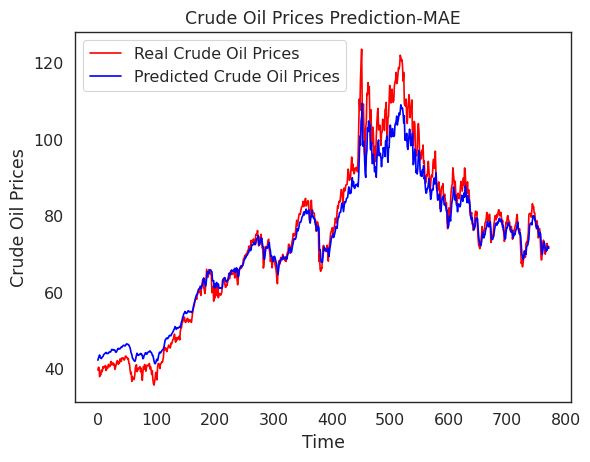

In [117]:
# Visualising the results
plt.plot(test_set[timesteps:len(y_test)], color = 'red', label = 'Real Crude Oil Prices')
plt.plot(y_test[0:len(y_test) - timesteps], color = 'blue', label = 'Predicted Crude Oil Prices')
plt.title('Crude Oil Prices Prediction-MAE')
plt.xlabel('Time')
plt.ylabel('Crude Oil Prices')
plt.legend()
plt.show()

In [118]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(test_set[timesteps:len(y_test)], y_test[0:len(y_test) - timesteps]))
print(rmse)

4.299779267279591


In [119]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(test_set[timesteps:len(y_test)], y_test[0:len(y_test) - timesteps])
print(mae)

3.117290950439137
